In [1]:
from preperation import *
from initial_plots import read_dataset
from classification import *

In [2]:
df = read_dataset(gt=False)

X = np.array(df)
X.reshape((610,340, 103))

df = read_dataset(gt=True)
y = np.array(df)

rows_factor=21
cols_factor=21

In [3]:
distances,P,y_patches,num_patches_in_row, labels_padded = prepare(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='center')

print(num_patches_in_row)

(510, 45423)
(510, 510)
(510, 510)
17


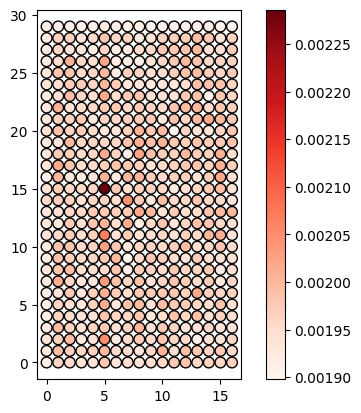

In [4]:
figure_B(distances, rows_factor, cols_factor)

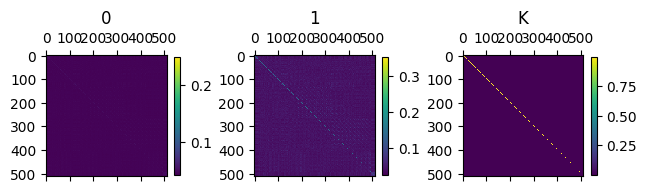

In [5]:
HDE = display_figure_C(distances)

In [6]:
d_HDD = hdd(HDE,P)

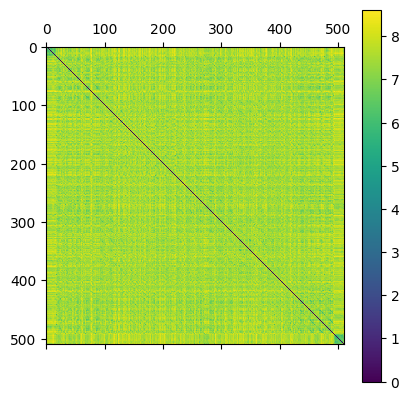

In [7]:
mat_show(d_HDD, plt.cm.viridis)

{0: (0, 21, 0, 21), 1: (0, 21, 21, 42), 2: (0, 21, 42, 63), 3: (0, 21, 63, 84), 4: (0, 21, 84, 105), 5: (0, 21, 105, 126), 6: (0, 21, 126, 147), 7: (0, 21, 147, 168), 8: (0, 21, 168, 189), 9: (0, 21, 189, 210), 10: (0, 21, 210, 231), 11: (0, 21, 231, 252), 12: (0, 21, 252, 273), 13: (0, 21, 273, 294), 14: (0, 21, 294, 315), 15: (0, 21, 315, 336), 16: (0, 21, 336, 357), 17: (21, 42, 0, 21), 18: (21, 42, 21, 42), 19: (21, 42, 42, 63), 20: (21, 42, 63, 84), 21: (21, 42, 84, 105), 22: (21, 42, 105, 126), 23: (21, 42, 126, 147), 24: (21, 42, 147, 168), 25: (21, 42, 168, 189), 26: (21, 42, 189, 210), 27: (21, 42, 210, 231), 28: (21, 42, 231, 252), 29: (21, 42, 252, 273), 30: (21, 42, 273, 294), 31: (21, 42, 294, 315), 32: (21, 42, 315, 336), 33: (21, 42, 336, 357), 34: (42, 63, 0, 21), 35: (42, 63, 21, 42), 36: (42, 63, 42, 63), 37: (42, 63, 63, 84), 38: (42, 63, 84, 105), 39: (42, 63, 105, 126), 40: (42, 63, 126, 147), 41: (42, 63, 147, 168), 42: (42, 63, 168, 189), 43: (42, 63, 189, 210), 

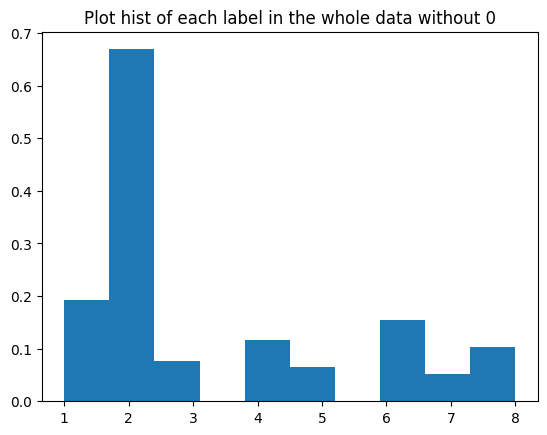

In [9]:
patch_to_points_dict = patch_to_points(y_patches, rows_factor, cols_factor, num_patches_in_row)

distances_mat, labels, new_res = throw_0_labels(d_HDD, y_patches, patch_to_points_dict)

print(labels.shape)

print(new_res)

plt.hist(labels,density=True)
plt.title("Plot hist of each label in the whole data without 0")
plt.show()

{0: (0, 21, 0, 21), 1: (0, 21, 21, 42), 2: (0, 21, 42, 63), 3: (0, 21, 63, 84), 4: (0, 21, 84, 105), 5: (0, 21, 105, 126), 6: (0, 21, 126, 147), 7: (0, 21, 147, 168), 8: (0, 21, 168, 189), 9: (0, 21, 189, 210), 10: (0, 21, 210, 231), 11: (0, 21, 231, 252), 12: (0, 21, 252, 273), 13: (0, 21, 273, 294), 14: (0, 21, 294, 315), 15: (0, 21, 315, 336), 16: (0, 21, 336, 357), 17: (21, 42, 0, 21), 18: (21, 42, 21, 42), 19: (21, 42, 42, 63), 20: (21, 42, 63, 84), 21: (21, 42, 84, 105), 22: (21, 42, 105, 126), 23: (21, 42, 126, 147), 24: (21, 42, 147, 168), 25: (21, 42, 168, 189), 26: (21, 42, 189, 210), 27: (21, 42, 210, 231), 28: (21, 42, 231, 252), 29: (21, 42, 252, 273), 30: (21, 42, 273, 294), 31: (21, 42, 294, 315), 32: (21, 42, 315, 336), 33: (21, 42, 336, 357), 34: (42, 63, 0, 21), 35: (42, 63, 21, 42), 36: (42, 63, 42, 63), 37: (42, 63, 63, 84), 38: (42, 63, 84, 105), 39: (42, 63, 105, 126), 40: (42, 63, 126, 147), 41: (42, 63, 147, 168), 42: (42, 63, 168, 189), 43: (42, 63, 189, 210), 

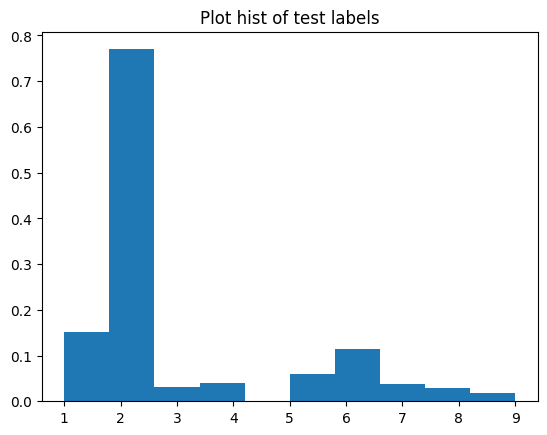

In [12]:
n_neighbors = 3

y_patches = y_patches.astype(int)

train_acc,test_acc, preds, labels_test = main(d_HDD, y_patches, n_neighbors, labels_padded, rows_factor, cols_factor, num_patches_in_row)


print("Number of points: ", (len(preds)))
print(preds)
print(labels_test)

plt.hist(labels_test,density=True)
plt.title("Plot hist of test labels")
plt.show()

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


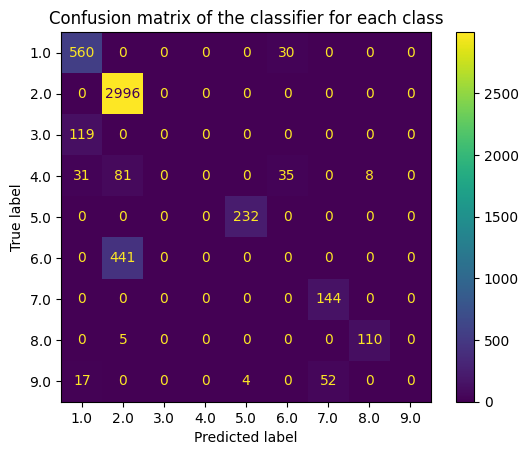

In [13]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(labels_test, preds)

display_labels = list(set(np.sort(np.concatenate((labels_test,preds)))))

print(display_labels)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = display_labels)

cm_display.plot()
plt.title("Confusion matrix of the classifier for each class")
plt.show()


In [14]:
# y_patches = y_patches.astype(int)


# train_acc_arr = []
# test_acc_arr = []

# for i in range(10):
#     train_acc,test_acc = main(d_HDD, y_patches)
#     train_acc_arr.append(train_acc)
#     test_acc_arr.append(test_acc)

# print("XXXXXXXXXXXXXXXXXXXXXXXXXX")
# print("MEAN TRAIN ACC: ", np.mean(train_acc_arr))
# print("MEAN TEST ACC: ", np.mean(test_acc_arr))
